In [1]:
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal

Using TensorFlow backend.


In [0]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    # fig.canvas.draw()

In [3]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [4]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [0]:
# if you observe the input shape its 2 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [6]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [7]:
# An example data point
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [0]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [9]:
# example data point after normlizing
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [10]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [0]:
from keras.models import Sequential 
from keras.layers import Dense, Activation 

In [0]:
# some model parameters

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 20

#### `Type-I` MLP_Relu_Adam_2Layer_1024_64

In [15]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization

model_drop = Sequential()

model_drop.add(Dense(1024, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
# model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))

# print(model_relu.summary())

model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

model_drop.summary()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/20





60000/60000 [==============================] - 15s 248us/step - loss: 0.5077 - acc: 0.8482 - val_loss: 0.1529 - val_acc: 0.9554
Epoch 2/20
60000/60000 [==============================] - 14s 233us/step - loss: 0.2440 - acc: 0.9279 - val_loss: 0.1150 - val_acc: 0.9644
Epoch 3/20
60000/60000 [==============================] - 14s 234us/step - loss: 0.1868 - acc: 0.9450 - val_loss: 0.0933 - val_acc: 0.9700
Epoch 4/20
60000/60000 [==============================] - 14s 230us/step - loss: 0.1617 - acc: 0.9528 - val_loss: 0.0907 - val_acc: 0.9739
Epoch 5/20
60000/60000 [==============================] - 15s 243us/step - loss: 0.1422 - acc: 0.9581 - val_loss: 0.0852 - val_acc: 0.9737
Epoch 6/20
60000/60000 [==============================] - 14s 234us/step - loss: 0.1256 - acc: 0.9631 - val_loss: 0.0749 - val_acc: 0.9782
Epoch 7/20
600

#### Accuracy

In [51]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
print(x)
print(vy)
print(ty) 
# plt_dynamic(x, vy, ty, ax)

Test score: 0.09080233381008729
Test accuracy: 0.9804


<IPython.core.display.Javascript object>

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[0.9364621857643127, 0.49075753841400144, 0.2855819786310196, 0.19964151360988616, 0.17320310388207436, 0.14879324183166026, 0.1371548559397459, 0.12790572729706765, 0.12123643999770284, 0.10966003392711282, 0.11899310316890478, 0.10949949248600752, 0.10622592614218593, 0.11184748293552547, 0.10049898426607251, 0.10034355153460056, 0.09705943623417988, 0.09053028036076576, 0.09708130745450035, 0.09080233482245821]
[2.058573489634196, 1.1087739948590596, 0.7454398405392965, 0.5526444519678751, 0.44117149138450623, 0.37196457761128743, 0.32815683867136636, 0.2821750131289164, 0.26549448329607644, 0.24212648111979165, 0.22209778400262198, 0.20570820608933768, 0.1968686815738678, 0.1755473879337311, 0.1770206745068232, 0.16906047227780024, 0.15631902202765147, 0.14764749088684717, 0.14192116012970607, 0.1365976075251897]


<IPython.core.display.Javascript object>


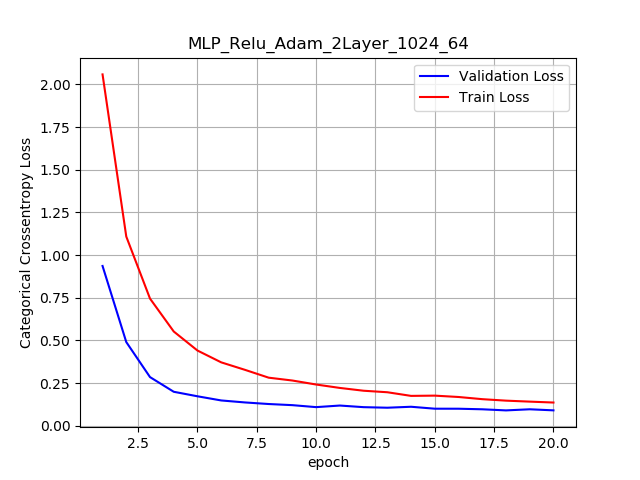

In [3]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; 
ax.set_ylabel('Categorical Crossentropy Loss')
ax.set_title(label="MLP_Relu_Adam_2Layer_1024_64")
plt_dynamic(x, vy, ty, ax)

#### `Type-II` MLP_Relu_Adam_3Layer_512_128_64

In [25]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
# model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
# model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))

# print(model_relu.summary())

model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

model_drop.summary()

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 162us/step - loss: 1.0693 - acc: 0.6588 - val_loss: 0.2757 - val_acc: 0.9233
Epoch 2/20
60000/60000 [==============================] - 9s 143us/step - loss: 0.4742 - acc: 0.8602 - val_loss: 0.1845 - val_acc: 0.9446
Epoch 3/20
60000/60000 [==============================] - 9s 150us/step - loss: 0.3542 - acc: 0.8994 - val_loss: 0.1449 - val_acc: 0.9573
Epoch 4/20
60000/60000 [==============================] - 9s 146us/step - loss: 0.2920 - acc: 0.9179 - val_loss: 0.1317 - val_acc: 0.9612
Epoch 5/20
60000/60000 [==============================] - 9s 143us/step - loss: 0.2549 - acc: 0.9285 - val_loss: 0.1135 - val_acc: 0.9672
Epoch 6/20
60000/60000 [==============================] - 9s 144us/step - loss: 0.2297 - acc: 0.9379 - val_loss: 0.1090 - val_acc: 0.9682
Epoch 7/20
60000/60000 [==============================] - 9s 142us/step - loss: 0.2101 - acc: 0.9415 - val_loss: 0.1017 -

#### Accuracy

In [52]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
print(x)
print(vy)
print(ty)
# plt_dynamic(x, vy, ty, ax)

Test score: 0.09080233381008729
Test accuracy: 0.9804


<IPython.core.display.Javascript object>

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[0.9364621857643127, 0.49075753841400144, 0.2855819786310196, 0.19964151360988616, 0.17320310388207436, 0.14879324183166026, 0.1371548559397459, 0.12790572729706765, 0.12123643999770284, 0.10966003392711282, 0.11899310316890478, 0.10949949248600752, 0.10622592614218593, 0.11184748293552547, 0.10049898426607251, 0.10034355153460056, 0.09705943623417988, 0.09053028036076576, 0.09708130745450035, 0.09080233482245821]
[2.058573489634196, 1.1087739948590596, 0.7454398405392965, 0.5526444519678751, 0.44117149138450623, 0.37196457761128743, 0.32815683867136636, 0.2821750131289164, 0.26549448329607644, 0.24212648111979165, 0.22209778400262198, 0.20570820608933768, 0.1968686815738678, 0.1755473879337311, 0.1770206745068232, 0.16906047227780024, 0.15631902202765147, 0.14764749088684717, 0.14192116012970607, 0.1365976075251897]


<IPython.core.display.Javascript object>


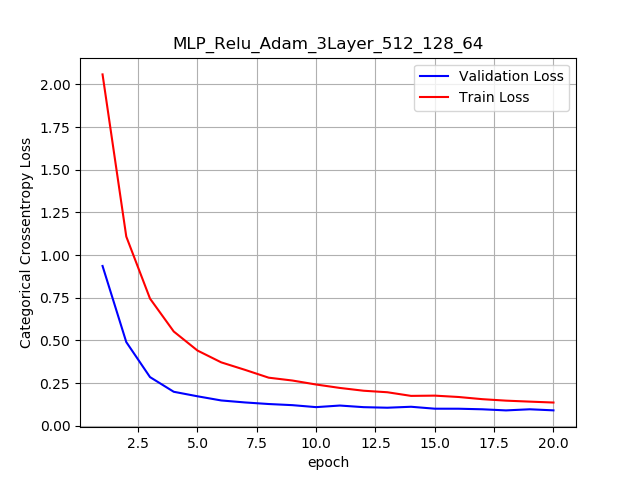

In [5]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; 
ax.set_ylabel('Categorical Crossentropy Loss')
ax.set_title(label="MLP_Relu_Adam_3Layer_512_128_64")
plt_dynamic(x, vy, ty, ax)

#### `Type-III` MLP_Relu_Adam_5Layer_1024_512_128_64_32

In [28]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(1024, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
# model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(512, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
# model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(32, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))

# print(model_relu.summary())

model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

model_drop.summary()

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 25s 415us/step - loss: 2.0586 - acc: 0.3012 - val_loss: 0.9365 - val_acc: 0.7289
Epoch 2/20
60000/60000 [==============================] - 23s 391us/step - loss: 1.1088 - acc: 0.6104 - val_loss: 0.4908 - val_acc: 0.8497
Epoch 3/20
60000/60000 [==============================] - 23s 384us/step - loss: 0.7454 - acc: 0.7522 - val_loss: 0.2856 - val_acc: 0.9286
Epoch 4/20
60000/60000 [==============================] - 23s 385us/step - loss: 0.5526 - acc: 0.8320 - val_loss: 0.1996 - val_acc: 0.9486
Epoch 5/20
60000/60000 [==============================] - 24s 394us/step - loss: 0.4412 - acc: 0.8744 - val_loss: 0.1732 - val_acc: 0.9566
Epoch 6/20
60000/60000 [==============================] - 23s 380us/step - loss: 0.3720 - acc: 0.8974 - val_loss: 0.1488 - val_acc: 0.9605
Epoch 7/20
60000/60000 [==============================] - 24s 395us/step - loss: 0.3282 - acc: 0.9149 - val_loss: 0.

#### Accuracy

In [53]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
print(x)
print(vy)
print(ty)
# plt_dynamic(x, vy, ty, ax)

Test score: 0.09080233381008729
Test accuracy: 0.9804


<IPython.core.display.Javascript object>

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[0.9364621857643127, 0.49075753841400144, 0.2855819786310196, 0.19964151360988616, 0.17320310388207436, 0.14879324183166026, 0.1371548559397459, 0.12790572729706765, 0.12123643999770284, 0.10966003392711282, 0.11899310316890478, 0.10949949248600752, 0.10622592614218593, 0.11184748293552547, 0.10049898426607251, 0.10034355153460056, 0.09705943623417988, 0.09053028036076576, 0.09708130745450035, 0.09080233482245821]
[2.058573489634196, 1.1087739948590596, 0.7454398405392965, 0.5526444519678751, 0.44117149138450623, 0.37196457761128743, 0.32815683867136636, 0.2821750131289164, 0.26549448329607644, 0.24212648111979165, 0.22209778400262198, 0.20570820608933768, 0.1968686815738678, 0.1755473879337311, 0.1770206745068232, 0.16906047227780024, 0.15631902202765147, 0.14764749088684717, 0.14192116012970607, 0.1365976075251897]


<IPython.core.display.Javascript object>


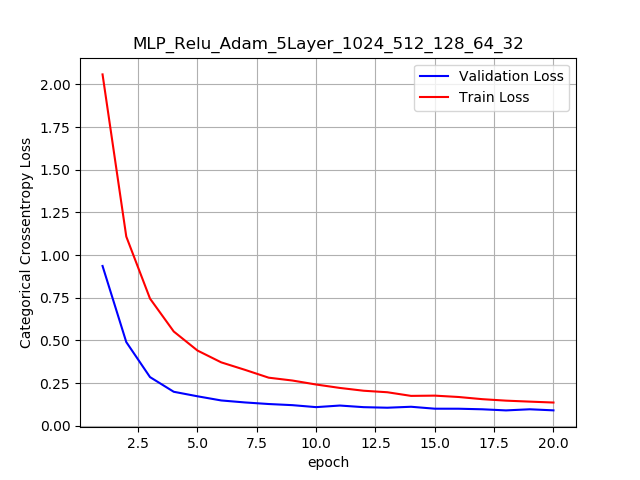

In [7]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; 
ax.set_ylabel('Categorical Crossentropy Loss')
ax.set_title(label="MLP_Relu_Adam_5Layer_1024_512_128_64_32")
plt_dynamic(x, vy, ty, ax)